# MNIST DIGIT DATASET CLASSIFICATION USING CNN(KERAS)

In this project, we are going to create a CNN based model to classify the digits from MNSIT digits dataset

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

## import dataset
* **keras have datasets module in it, from that we can load our required dataset**

In [2]:
from keras.datasets import mnist

(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
# count the number of unique train labels
unique, counts = np.unique(Y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(Y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


## Data Visualization

below code plot the images in 6x6 plot, so that we can visulize the following data

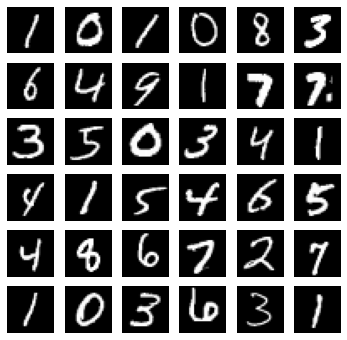

In [4]:
indexes = np.random.randint(0,X_train.shape[0],size = 36)
images  = X_train[indexes]

#plot
plt.figure(figsize=(6,6))
for i in range(len(indexes)):
    plt.subplot(6,6,i+1)
    image = images[i]
    plt.imshow(image,cmap='gray')
    plt.axis('off')

plt.show()
    

## Data preprocessing
in this segment, we will preprocess the data which is required for our model

* for the case of output, since our output is catergorical, we convert our Y part with the help of one hot encoding.  
* for the case of input, we normalize the data from [0-255] to [0-1] range, so our data will train smoothly

In [5]:
#converting y_data into catergorical
from keras.utils import to_categorical

num_classes = 10

Y_train = to_categorical(Y_train,num_classes)
Y_test  = to_categorical(Y_test,num_classes)

#reshape the X data
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

# normalizing X data
X_train = X_train/255
X_test = X_test/255

## CNN Model
* by using keras, we use cnn model to train the MNSIT dataset

In [6]:
input_shape = X_train[0].shape

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape = input_shape),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(units=10,activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
____________________________________________________

## Compiling model
* In this step, we add optimizer, loss function

In [9]:
model.compile(
    
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ["accuracy"]

)

## Training the model

In [10]:
batch_size = 128
epochs = 15

history = model.fit(X_train,Y_train,
                   epochs = epochs,
                    batch_size = batch_size,
                    validation_split = 0.1
                   )

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 27s 505us/sample - loss: 0.2937 - accuracy: 0.9135 - val_loss: 0.0822 - val_accuracy: 0.9770
Epoch 2/15
54000/54000 [==============================] - 27s 499us/sample - loss: 0.0779 - accuracy: 0.9763 - val_loss: 0.0537 - val_accuracy: 0.9845
Epoch 3/15
54000/54000 [==============================] - 27s 495us/sample - loss: 0.0562 - accuracy: 0.9831 - val_loss: 0.0440 - val_accuracy: 0.9875
Epoch 4/15
54000/54000 [==============================] - 28s 512us/sample - loss: 0.0469 - accuracy: 0.9860 - val_loss: 0.0393 - val_accuracy: 0.9888
Epoch 5/15
54000/54000 [==============================] - 27s 509us/sample - loss: 0.0383 - accuracy: 0.9884 - val_loss: 0.0452 - val_accuracy: 0.9877
Epoch 6/15
54000/54000 [==============================] - 26s 478us/sample - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0355 - val_accuracy: 0.9895
Epoch 7/15
54000/54000 [=====================

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03437685346444996
Test accuracy: 0.9902


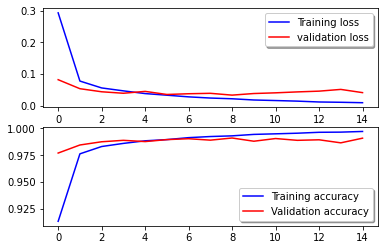

In [12]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [14]:
# Look at confusion matrix 
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
print(confusion_mtx)

[[ 974    0    0    0    1    0    2    2    1    0]
 [   0 1128    3    1    2    0    1    0    0    0]
 [   1    0 1020    0    1    0    0    5    5    0]
 [   0    0    1 1002    0    3    0    0    4    0]
 [   0    0    0    0  976    0    1    1    1    3]
 [   1    0    0    7    0  880    2    0    2    0]
 [   1    2    0    0    2    4  946    0    3    0]
 [   0    1    4    1    0    0    0 1017    2    3]
 [   2    0    2    1    1    0    0    0  966    2]
 [   0    0    0    0    7    5    1    1    2  993]]
